In [10]:
!pip install kaggle
api = {"username":"preranaghosh","key":"233c864f0171ef02adfb757522898c17"}

import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)

with open(os.path.expanduser('~/.kaggle/kaggle.json'), 'w') as f:
    json.dump(api, f)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c house-prices-advanced-regression-techniques

!ls

!unzip -v house-prices-advanced-regression-techniques.zip

!unzip house-prices-advanced-regression-techniques.zip

!ls train.csv

data = pd.read_csv('C:/Users/Dell/Desktop/Home/train.csv') 

y = data['SalePrice'].values
X = data[['OverallQual']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

def train_linear_regression(X, y):
    x_mean = np.mean(X)
    y_mean = np.mean(y)
    num = np.sum((X - x_mean) * (y - y_mean))
    denom = np.sum((X - x_mean)**2)
    m = num/denom
    b = y_mean - m * x_mean
    return m, b

m, b = train_linear_regression(X_train, y_train)

pred_house_price = m * X_test + b
y_pred_custom = pred_house_price  
mse_custom = mean_squared_error(y_test, y_pred_custom)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

pred_house_price2 = lr_model.predict(X_test)
y_pred_sklearn = pred_house_price2  
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)

plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, label='Data for Training')
plt.plot(X_train, m * X_train + b, label='Custom Model Linear Regression')
plt.plot(X_train, lr_model.predict(X_train), label='Sklearn Model Linear Regression')
plt.title('Training: Custom vs Sklearn Linear Regression')
plt.ylabel('SalePrice')
plt.xlabel('OverallQual')
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(X_test, y_test, label='Data for Testing')
plt.plot(X_test, pred_house_price, label='Custom Model Linear Regression')
plt.plot(X_test, pred_house_price2, label='Sklearn Model Linear Regression')
plt.title('Testing: Custom vs Sklearn Linear Regression')
plt.ylabel('SalePrice')
plt.xlabel('OverallQual')
plt.legend()
plt.show()


'chmod' is not recognized as an internal or external command,
operable program or batch file.


house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


'ls' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.
'ls' is not recognized as an internal or external command,
operable program or batch file.


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Dell/Desktop/Home/train.csv'

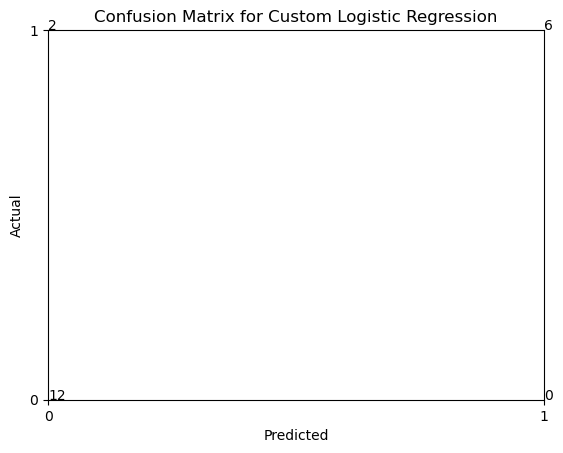

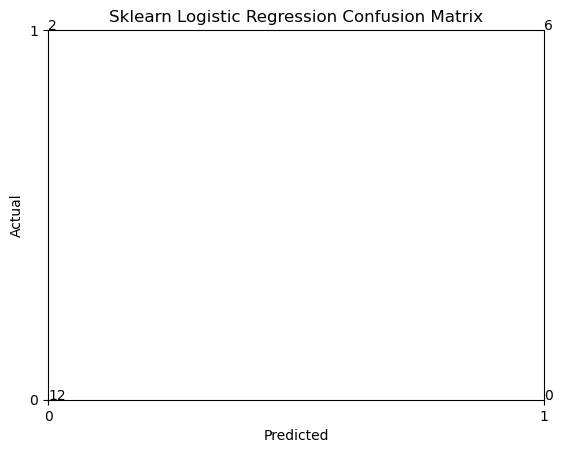

Comparison of Evaluation
Metric Custom Sklearn
0.9
0.9
1.0
1.0
0.75
0.75
0.8571428571428571
0.8571428571428571


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

X = np.random.randn(100, 2) 
y = (X[:, 0] + X[:, 1] > 0).astype(int)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def logistic_regr(X, y, lr=0.01, epochs=500):
    m = len(y)
    X_bias = np.c_[np.ones((m, 1)), X]
    w = np.zeros(X_bias.shape[1])
    for i in range(epochs):
        z = np.dot(X_bias, w)
        h = sigmoid(z)
        grad = np.dot(X_bias.T, (h - y)) / m
        w = w - lr * grad 
    return w

w = logistic_regr(X_train, y_train)

def pred(X, w):
    X_bias = np.c_[np.ones((X.shape[0], 1)), X]
    probs = sigmoid(np.dot(X_bias, w))
    return (probs >= 0.5).astype(int)

y_pred_custom = pred(X_test, w)  
acc_custom = accuracy_score(y_test, y_pred_custom)

def plot_confusion_matrix(cm, title="Confusion_Matrix"): 
    fig, ax = plt.subplots()
    plt.title(title)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['0', '1'])
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['0', '1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, val)
    plt.show()

cm_custom = confusion_matrix(y_test, y_pred_custom)
plot_confusion_matrix(cm_custom, title='Confusion Matrix for Custom Logistic Regression')

cl = LogisticRegression()
cl.fit(X_train, y_train)
y_pred_sklearn = cl.predict(X_test)
acc_sklearn = accuracy_score(y_test, y_pred_sklearn)

cm_sklearn = confusion_matrix(y_test, y_pred_sklearn)
plot_confusion_matrix(cm_sklearn, title='Sklearn Logistic Regression Confusion Matrix')

precision_custom = precision_score(y_test, y_pred_custom)
recall_custom = recall_score(y_test, y_pred_custom)
f1_custom = f1_score(y_test, y_pred_custom)

precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)
f1_sklearn = f1_score(y_test, y_pred_sklearn)

print('Comparison of Evaluation')
print('Metric Custom Sklearn')
print(acc_custom)
print(acc_sklearn)
print(precision_custom)
print(precision_sklearn)
print(recall_custom)
print(recall_sklearn)
print(f1_custom)
print(f1_sklearn)



